In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y = data.pop('class').values
X = data.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf = GaussianNB()
clf.fit(trnX, trnY)
clf.score(tstX, tstY)

0.7268722466960352

In [86]:
import numpy as np
import sklearn.metrics as metrics

labels: np.ndarray = pd.unique(y)
prdY: np.ndarray = clf.predict(tstX)
cnf_mtx: np.ndarray = metrics.confusion_matrix(tstY, prdY, labels)
cnf_mtx

array([[144,  25],
       [ 37,  21]], dtype=int64)

<Figure size 432x288 with 0 Axes>

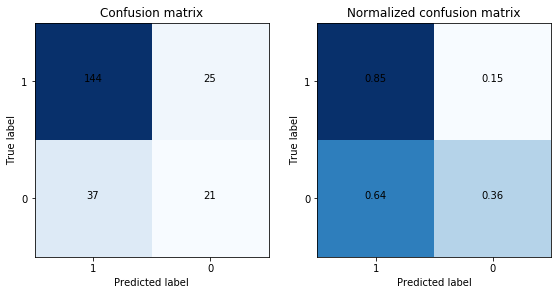

In [87]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(ax: plt.Axes, cnf_matrix: np.ndarray, classes_names: list, normalize: bool = False):
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center")
 

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(axs[0,0], cnf_mtx, labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(tstY, prdY, labels), labels, normalize=True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

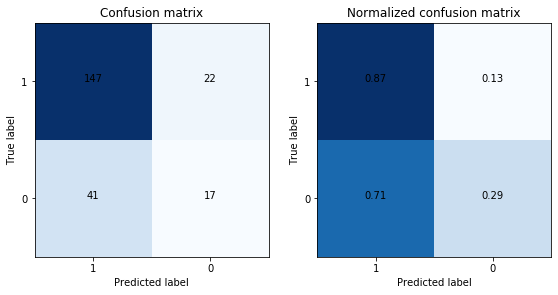

In [88]:
data = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y = data.pop('class').values
X = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf = GaussianNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(axs[0,0], metrics.confusion_matrix(tstY, prdY, labels), labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(tstY, prdY, labels), labels, normalize=True)
plt.tight_layout()
plt.show()

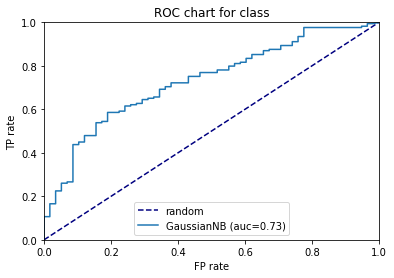

In [89]:
def plot_roc_chart(ax: plt.Axes, models: dict, tstX, tstY, target: str='class'):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s'%target)
    ax.plot([0, 1], [0, 1], color='navy', label='random', linestyle='--')
    
    for clf in models:
        scores = models[clf].predict_proba(tstX)[:,1]
        fpr, tpr, _ = metrics.roc_curve(tstY, scores,  pos_label=1)
        roc_auc = metrics.roc_auc_score(tstY, scores)
        ax.plot(fpr, tpr, label='%s (auc=%0.2f)' %(clf, roc_auc))
    ax.legend(loc="lower center")


data = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y = data.pop('class').values
X = data.values
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
model = GaussianNB().fit(trnX, trnY)

plt.figure()
plot_roc_chart(plt.gca(), {'GaussianNB': model}, tstX, tstY, 'class')
plt.show()

In [90]:
import numpy as np

def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    

# KNN no balance

(252, 755)
Accuracy score: 0.7631578947368421 

Confusion matrix, without normalization
[[10  9]
 [ 9 48]]


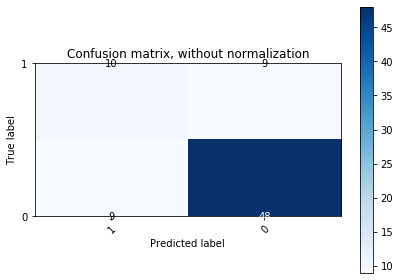

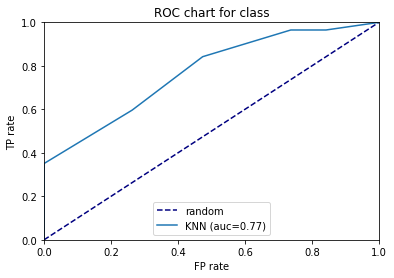

In [91]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#FAzer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)

#Drop lable

X = data.drop(columns=['class'])
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(X_train,y_train)
#knn.score(X_test, y_test)   
y_predict = knn.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

labels = pd.unique(y)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_predict, classes=labels, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

plt.figure()
plot_roc_chart(plt.gca(), {'KNN': knn}, X_test, y_test, 'class')
plt.show()

# Naive Bayes

Accuracy score: 0.75 

Confusion matrix, without normalization
[[ 1 18]
 [ 1 56]]


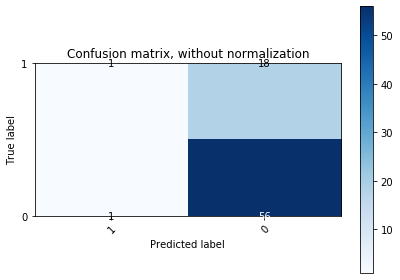

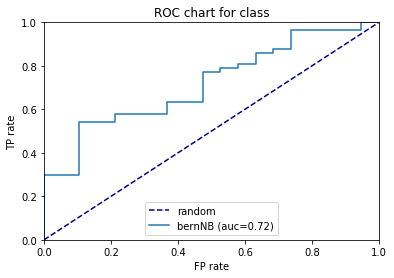

In [92]:
bernNB = BernoulliNB(binarize = True)
bernNB.fit(X_train, y_train)
y_predict = bernNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_roc_chart(plt.gca(), {'bernNB': bernNB}, X_test, y_test, 'class')
plt.show()

Accuracy score: 0.7763157894736842 

Confusion matrix, without normalization
[[ 9 10]
 [ 7 50]]


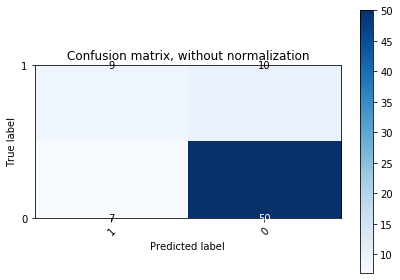

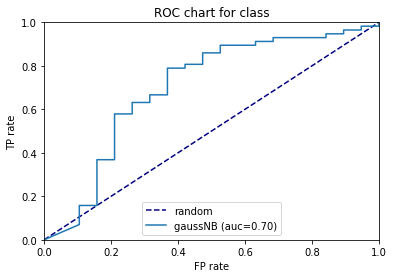

In [93]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
y_predict = gaussNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_roc_chart(plt.gca(), {'gaussNB': gaussNB}, X_test, y_test, 'class')
plt.show()

# Balancing

In [94]:
data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#FAzer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)

(252, 755)


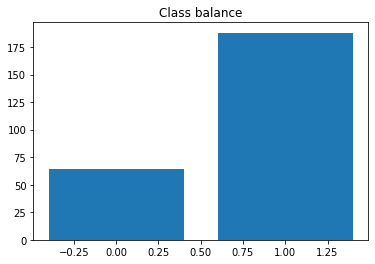

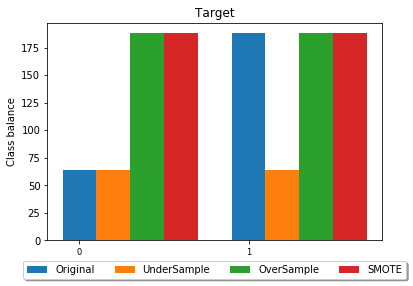

(252, 754)
(376, 755)


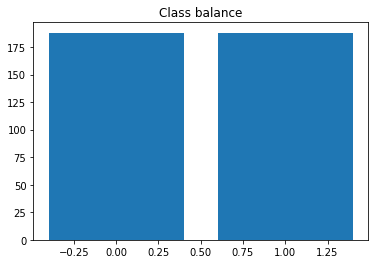

In [95]:
#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()

print(data.shape)
print(df_SMOTE.shape)
data = df_SMOTE

#Drop lable

X = data.drop(columns=['class'])
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


#Use SMOTE?
target_count = data['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

# KNN

Accuracy score: 0.7345132743362832 

Confusion matrix, without normalization
[[47  9]
 [21 36]]


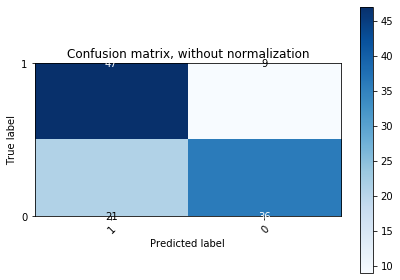

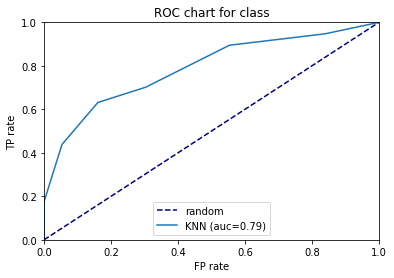

In [96]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(X_train,y_train)
#knn.score(X_test, y_test)   
y_predict = knn.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

labels = pd.unique(y)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_predict, classes=labels, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

plt.figure()
plot_roc_chart(plt.gca(), {'KNN': knn}, X_test, y_test, 'class')
plt.show()

# Naive Bayes

Accuracy score: 0.6194690265486725 

Confusion matrix, without normalization
[[27 29]
 [14 43]]


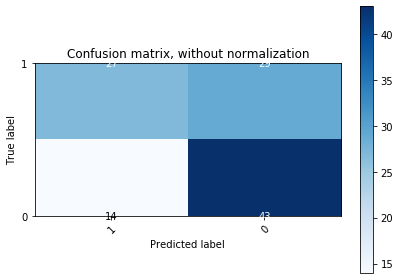

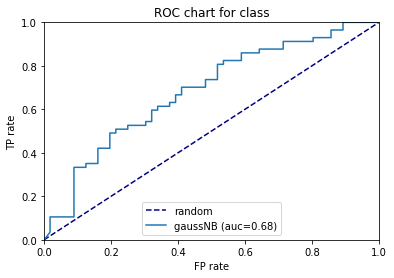

In [97]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
y_predict = gaussNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_roc_chart(plt.gca(), {'gaussNB': gaussNB}, X_test, y_test, 'class')
plt.show()

Accuracy score: 0.7433628318584071 

Confusion matrix, without normalization
[[45 11]
 [18 39]]


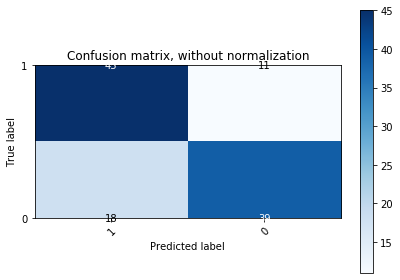

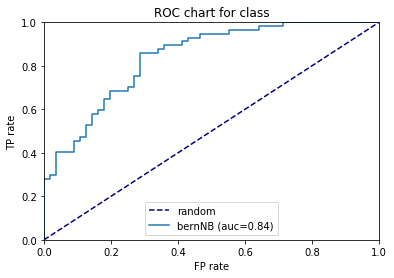

In [98]:
bernNB = BernoulliNB(binarize = True)
bernNB.fit(X_train, y_train)
y_predict = bernNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_roc_chart(plt.gca(), {'bernNB': bernNB}, X_test, y_test, 'class')
plt.show()